In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [125]:
#importing dataset for EDA
df_mvc = pd.read_csv("C://Users//ramsu//Downloads//Motor_Vehicle_Collisions_-_Vehicles.csv", low_memory = False)
df_mvc

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,PRE_CRASH,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2
0,10385780,100201,09/07/2012,9:03,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
1,19140702,4213082,09/23/2019,8:15,0553ab4d-9500-4cba-8d98-f4d7f89d5856,NY,Station Wagon/Sport Utility Vehicle,TOYT -CAR/SUV,NaN,2002.0,...,Going Straight Ahead,Left Front Bumper,Left Front Quarter Panel,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified
2,14887647,3307608,10/02/2015,17:18,2,NY,TAXI,NaN,NaN,NaN,...,Going Straight Ahead,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Driver Inattention/Distraction,NaN
3,14889754,3308693,10/04/2015,20:34,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,Parked,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unspecified,NaN
4,14400270,297666,04/25/2013,21:15,1,NY,PASSENGER VEHICLE,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other Vehicular,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704401,20083223,4466593,10/11/2021,11:00,517fa844-84ac-4a52-aa06-b6b62c59903e,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,...,Going Straight Ahead,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,No Damage,No Damage,N,NaN,Following Too Closely,Unspecified
3704402,20083044,4466424,10/11/2021,7:15,10f6574c-8056-43ab-bfab-9162e074001a,NY,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2011.0,...,Parked,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper,N,NaN,Unspecified,Unspecified
3704403,20081526,4465968,10/11/2021,0:15,28cee7e8-669b-4888-997c-994702e81803,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2016.0,...,Making Right Turn,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Unspecified
3704404,20083216,4466592,10/11/2021,22:10,5f074db1-454a-496a-939e-bc38fe90b421,SC,Sedan,NISS -CAR/SUV,NaN,2001.0,...,Going Straight Ahead,Right Front Bumper,Right Front Bumper,Center Front End,Left Front Bumper,NaN,N,NaN,Brakes Defective,Unspecified


In [138]:
#structure of the source dataset
df_mvc.shape

(3704406, 26)

In [165]:
df_mvc.sample(5)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,CRASH_YEAR
325276,20074454,4462484,09/27/2021,19:56,bbabb3eb-e7e4-4b67-815f-0d24d09fd640,NY,Sedan,AUDI -CAR/SUV,NaN,2017.0,...,Left Rear Quarter Panel,Left Side Doors,Left Rear Quarter Panel,NaN,NaN,N,NaN,Unspecified,Unspecified,2021


In [126]:
# Retrieving the last 3 years (2019-2021) data from the source dataset
df_mvc['CRASH_YEAR'] = pd.DatetimeIndex(df_mvc['CRASH_DATE']).year
df_mvc_update = df_mvc[df_mvc['CRASH_YEAR']> 2019]
df_mvc_update

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,CRASH_YEAR
14,19694316,4322767,06/06/2020,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,NaN,...,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified,2020
221,19693462,4322092,06/22/2020,7:30,eadf72ff-d03f-430d-8505-d9db881c3332,NY,Sedan,TOYT -CAR/SUV,NaN,2015.0,...,Center Front End,Center Front End,Left Front Bumper,Right Front Bumper,No Damage,N,NaN,Unspecified,Unspecified,2020
238,19693299,4322349,06/22/2020,18:10,7675ccbe-68b6-4842-8998-ebe005cc0d5d,NY,Van,TOYT-TRUCK/BUS,NaN,2016.0,...,Right Side Doors,Right Side Doors,NaN,NaN,NaN,N,NaN,Other Vehicular,Other Vehicular,2020
410,19693635,4322428,06/22/2020,15:37,63b1633c-fba4-4c6d-aff4-8dfea98db833,NaN,Sedan,NaN,NaN,NaN,...,Other,Other,Other,Other,Other,N,NaN,Unspecified,Unspecified,2020
972,19693330,4322338,06/22/2020,10:19,97331e7e-4d04-40dc-8593-2c0dc0c5b032,NY,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,NaN,2015.0,...,Left Front Bumper,Left Front Bumper,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704401,20083223,4466593,10/11/2021,11:00,517fa844-84ac-4a52-aa06-b6b62c59903e,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,...,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,No Damage,No Damage,N,NaN,Following Too Closely,Unspecified,2021
3704402,20083044,4466424,10/11/2021,7:15,10f6574c-8056-43ab-bfab-9162e074001a,NY,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2011.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper,N,NaN,Unspecified,Unspecified,2021
3704403,20081526,4465968,10/11/2021,0:15,28cee7e8-669b-4888-997c-994702e81803,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2016.0,...,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Unspecified,2021
3704404,20083216,4466592,10/11/2021,22:10,5f074db1-454a-496a-939e-bc38fe90b421,SC,Sedan,NISS -CAR/SUV,NaN,2001.0,...,Right Front Bumper,Right Front Bumper,Center Front End,Left Front Bumper,NaN,N,NaN,Brakes Defective,Unspecified,2021


In [129]:
#Reset index for the updated dataset
df_mvc_update = df_mvc_update.reset_index(drop=True)
df_mvc_update

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,CRASH_YEAR
0,19694316,4322767,06/06/2020,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,NaN,...,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified,2020
1,19693462,4322092,06/22/2020,7:30,eadf72ff-d03f-430d-8505-d9db881c3332,NY,Sedan,TOYT -CAR/SUV,NaN,2015.0,...,Center Front End,Center Front End,Left Front Bumper,Right Front Bumper,No Damage,N,NaN,Unspecified,Unspecified,2020
2,19693299,4322349,06/22/2020,18:10,7675ccbe-68b6-4842-8998-ebe005cc0d5d,NY,Van,TOYT-TRUCK/BUS,NaN,2016.0,...,Right Side Doors,Right Side Doors,NaN,NaN,NaN,N,NaN,Other Vehicular,Other Vehicular,2020
3,19693635,4322428,06/22/2020,15:37,63b1633c-fba4-4c6d-aff4-8dfea98db833,NaN,Sedan,NaN,NaN,NaN,...,Other,Other,Other,Other,Other,N,NaN,Unspecified,Unspecified,2020
4,19693330,4322338,06/22/2020,10:19,97331e7e-4d04-40dc-8593-2c0dc0c5b032,NY,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,NaN,2015.0,...,Left Front Bumper,Left Front Bumper,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442104,20083223,4466593,10/11/2021,11:00,517fa844-84ac-4a52-aa06-b6b62c59903e,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,...,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,No Damage,No Damage,N,NaN,Following Too Closely,Unspecified,2021
442105,20083044,4466424,10/11/2021,7:15,10f6574c-8056-43ab-bfab-9162e074001a,NY,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2011.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper,N,NaN,Unspecified,Unspecified,2021
442106,20081526,4465968,10/11/2021,0:15,28cee7e8-669b-4888-997c-994702e81803,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2016.0,...,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Unspecified,2021
442107,20083216,4466592,10/11/2021,22:10,5f074db1-454a-496a-939e-bc38fe90b421,SC,Sedan,NISS -CAR/SUV,NaN,2001.0,...,Right Front Bumper,Right Front Bumper,Center Front End,Left Front Bumper,NaN,N,NaN,Brakes Defective,Unspecified,2021


In [133]:
#structure of the updated dataset
df_mvc_update.shape

(442109, 26)

In [162]:
type(df_mvc_update)

pandas.core.frame.DataFrame

In [130]:
#Retrieves the top rows of the given dataset
df_mvc_update.head()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,CRASH_YEAR
0,19694316,4322767,06/06/2020,18:30,fdc195a7-8127-4c00-834d-bac78b0cf88e,NaN,Bike,NaN,NaN,NaN,...,Center Front End,No Damage,No Damage,No Damage,No Damage,N,NaN,Traffic Control Disregarded,Unspecified,2020
1,19693462,4322092,06/22/2020,7:30,eadf72ff-d03f-430d-8505-d9db881c3332,NY,Sedan,TOYT -CAR/SUV,NaN,2015.0,...,Center Front End,Center Front End,Left Front Bumper,Right Front Bumper,No Damage,N,NaN,Unspecified,Unspecified,2020
2,19693299,4322349,06/22/2020,18:10,7675ccbe-68b6-4842-8998-ebe005cc0d5d,NY,Van,TOYT-TRUCK/BUS,NaN,2016.0,...,Right Side Doors,Right Side Doors,NaN,NaN,NaN,N,NaN,Other Vehicular,Other Vehicular,2020
3,19693635,4322428,06/22/2020,15:37,63b1633c-fba4-4c6d-aff4-8dfea98db833,NaN,Sedan,NaN,NaN,NaN,...,Other,Other,Other,Other,Other,N,NaN,Unspecified,Unspecified,2020
4,19693330,4322338,06/22/2020,10:19,97331e7e-4d04-40dc-8593-2c0dc0c5b032,NY,Station Wagon/Sport Utility Vehicle,MERZ -CAR/SUV,NaN,2015.0,...,Left Front Bumper,Left Front Bumper,NaN,NaN,NaN,N,NaN,Driver Inattention/Distraction,Unspecified,2020


In [131]:
# Retrieves the bottom rows of the given dataset
df_mvc_update.tail()

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,CRASH_YEAR
442104,20083223,4466593,10/11/2021,11:00,517fa844-84ac-4a52-aa06-b6b62c59903e,NY,Station Wagon/Sport Utility Vehicle,FORD -CAR/SUV,NaN,2005.0,...,Right Front Quarter Panel,Right Front Quarter Panel,Right Front Bumper,No Damage,No Damage,N,NaN,Following Too Closely,Unspecified,2021
442105,20083044,4466424,10/11/2021,7:15,10f6574c-8056-43ab-bfab-9162e074001a,NY,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2011.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Side Doors,Left Front Quarter Panel,Left Front Bumper,N,NaN,Unspecified,Unspecified,2021
442106,20081526,4465968,10/11/2021,0:15,28cee7e8-669b-4888-997c-994702e81803,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2016.0,...,Left Front Bumper,Left Front Bumper,Center Front End,NaN,NaN,N,NaN,Failure to Yield Right-of-Way,Unspecified,2021
442107,20083216,4466592,10/11/2021,22:10,5f074db1-454a-496a-939e-bc38fe90b421,SC,Sedan,NISS -CAR/SUV,NaN,2001.0,...,Right Front Bumper,Right Front Bumper,Center Front End,Left Front Bumper,NaN,N,NaN,Brakes Defective,Unspecified,2021
442108,20083752,4466794,10/08/2021,23:30,fcad9a4f-b2ea-48ef-b4a4-d46e95628324,NY,Station Wagon/Sport Utility Vehicle,HOND -CAR/SUV,NaN,2013.0,...,Center Front End,Center Front End,Left Front Bumper,Right Front Bumper,NaN,N,NaN,Driver Inattention/Distraction,Driver Inexperience,2021


In [132]:
#Retrieves the random rows from the given dataset
df_mvc_update.sample(10)

,UNIQUE_ID,COLLISION_ID,CRASH_DATE,CRASH_TIME,VEHICLE_ID,STATE_REGISTRATION,VEHICLE_TYPE,VEHICLE_MAKE,VEHICLE_MODEL,VEHICLE_YEAR,...,POINT_OF_IMPACT,VEHICLE_DAMAGE,VEHICLE_DAMAGE_1,VEHICLE_DAMAGE_2,VEHICLE_DAMAGE_3,PUBLIC_PROPERTY_DAMAGE,PUBLIC_PROPERTY_DAMAGE_TYPE,CONTRIBUTING_FACTOR_1,CONTRIBUTING_FACTOR_2,CRASH_YEAR
403832,19598123,4301806,03/18/2020,9:00,3ac7a8e9-e4f5-46f0-aebf-5bb986681da7,NY,Sedan,TOYT -CAR/SUV,NaN,2017.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Rear Quarter Panel,Left Rear Quarter Panel,N,NaN,Unspecified,Unspecified,2020
296640,20040055,4446945,08/08/2021,16:30,4bbd2389-52c7-44c3-9bc0-6e6c82fc4721,NY,Sedan,HOND -CAR/SUV,NaN,2019.0,...,Left Front Bumper,Left Front Bumper,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2021
245210,19963055,4424532,06/05/2021,14:45,fa80e455-4205-4486-904d-8f6f89ebc63b,NY,Station Wagon/Sport Utility Vehicle,JEEP -CAR/SUV,NaN,2013.0,...,Right Front Quarter Panel,Right Front Quarter Panel,Right Side Doors,NaN,NaN,N,NaN,Unspecified,Unspecified,2021
320317,20069026,4460190,09/20/2021,0:00,fe94d0b7-5b53-468d-b339-a2d6b3d77883,DE,Sedan,VOLV -CAR/SUV,NaN,2013.0,...,Right Rear Bumper,Right Rear Bumper,Center Back End,Center Front End,No Damage,N,NaN,Following Too Closely,Unspecified,2021
410211,19559188,4301285,02/11/2020,15:30,83d2e7df-e965-4071-8d11-f6c959812f70,NY,Sedan,TOYT -CAR/SUV,NaN,2010.0,...,Right Front Bumper,Right Front Bumper,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified,2020
44018,19737071,4342166,08/24/2020,14:58,c958bd32-e77d-4168-9977-915a05b08d0f,NY,Station Wagon/Sport Utility Vehicle,NISS -CAR/SUV,NaN,2020.0,...,Center Front End,No Damage,NaN,NaN,NaN,N,NaN,Following Too Closely,Driver Inattention/Distraction,2020
343594,19548018,4288016,02/13/2020,13:50,da187065-d048-4202-b8af-2ceb77d1209a,NY,Sedan,FORD -CAR/SUV,NaN,2017.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,No Damage,No Damage,No Damage,N,NaN,Unspecified,Unspecified,2020
220463,20006832,4430462,06/22/2021,21:45,c772de0f-432c-49d8-8641-63a0b403f2b9,FL,Sedan,CHRY -CAR/SUV,NaN,2019.0,...,Left Side Doors,Left Side Doors,Left Rear Quarter Panel,No Damage,No Damage,N,NaN,Following Too Closely,Unspecified,2021
339758,19606015,4310292,04/25/2020,15:55,6f9e6c7d-b855-4ce1-a6f1-4e2ce8a59bf3,NY,Sedan,HYUN -CAR/SUV,NaN,2013.0,...,Right Side Doors,Right Side Doors,Right Front Quarter Panel,Right Front Bumper,NaN,N,NaN,Unspecified,Unspecified,2020
96678,19795694,4368295,11/16/2020,12:45,d313b072-0983-4901-9b12-4d72e8bb8071,NY,Sedan,HOND -CAR/SUV,NaN,2018.0,...,Left Rear Quarter Panel,Left Rear Quarter Panel,NaN,NaN,NaN,N,NaN,Unspecified,Unspecified,2020


In [277]:
#Descritpion of the given dataset
df_mvc_update.describe()

,UNIQUE_ID,COLLISION_ID,VEHICLE_YEAR,VEHICLE_OCCUPANTS,CRASH_YEAR,CRASH_MONTH
count,1.517810e+05,1.517810e+05,151781.000000,151781.000000,151781.000000,151781.000000
mean,1.981216e+07,4.370399e+06,2008.342665,0.883839,2020.439449,6.039089
std,1.853129e+05,6.224679e+04,4.690961,0.609058,0.496322,3.435079
min,1.922295e+07,4.073803e+06,1933.000000,0.000000,2020.000000,1.000000
25%,1.967868e+07,4.315289e+06,2006.000000,0.000000,2020.000000,3.000000
50%,1.979617e+07,4.368252e+06,2009.000000,1.000000,2020.000000,6.000000
75%,1.999084e+07,4.423125e+06,2012.000000,1.000000,2021.000000,9.000000
max,2.012169e+07,4.484191e+06,2014.000000,2.000000,2021.000000,12.000000


In [135]:
#Information on the datatypes in the given dataset
df_mvc_update.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442109 entries, 0 to 442108
Data columns (total 26 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   UNIQUE_ID                    442109 non-null  int64  
 1   COLLISION_ID                 442109 non-null  int64  
 2   CRASH_DATE                   442109 non-null  object 
 3   CRASH_TIME                   442109 non-null  object 
 4   VEHICLE_ID                   442109 non-null  object 
 5   STATE_REGISTRATION           368732 non-null  object 
 6   VEHICLE_TYPE                 389063 non-null  object 
 7   VEHICLE_MAKE                 360723 non-null  object 
 8   VEHICLE_MODEL                0 non-null       object 
 9   VEHICLE_YEAR                 355638 non-null  float64
 10  TRAVEL_DIRECTION             410542 non-null  object 
 11  VEHICLE_OCCUPANTS            384034 non-null  float64
 12  DRIVER_SEX                   288683 non-null  object 
 13 

In [137]:
# Total null values present for each row in the provided dataset
df_mvc_update.isnull().sum()

UNIQUE_ID                           0
COLLISION_ID                        0
CRASH_DATE                          0
CRASH_TIME                          0
VEHICLE_ID                          0
STATE_REGISTRATION              73377
VEHICLE_TYPE                    53046
VEHICLE_MAKE                    81386
VEHICLE_MODEL                  442109
VEHICLE_YEAR                    86471
TRAVEL_DIRECTION                31567
VEHICLE_OCCUPANTS               58075
DRIVER_SEX                     153426
DRIVER_LICENSE_STATUS          168930
DRIVER_LICENSE_JURISDICTION    170891
PRE_CRASH                       37457
POINT_OF_IMPACT                 38711
VEHICLE_DAMAGE                  44524
VEHICLE_DAMAGE_1               172556
VEHICLE_DAMAGE_2               235056
VEHICLE_DAMAGE_3               285673
PUBLIC_PROPERTY_DAMAGE              0
PUBLIC_PROPERTY_DAMAGE_TYPE    436035
CONTRIBUTING_FACTOR_1           29603
CONTRIBUTING_FACTOR_2           35011
CRASH_YEAR                          0
dtype: int64

In [139]:
#Retrieves the row values of the row number provided from the source dataset
df_mvc.loc[10]

UNIQUE_ID                                17285715
COLLISION_ID                              3487936
CRASH_DATE                             07/22/2016
CRASH_TIME                                  15:40
VEHICLE_ID                                 554272
STATE_REGISTRATION                             NY
VEHICLE_TYPE                          Convertible
VEHICLE_MAKE                        VOLK -CAR/SUV
VEHICLE_MODEL                                 NaN
VEHICLE_YEAR                               2013.0
TRAVEL_DIRECTION                            South
VEHICLE_OCCUPANTS                             1.0
DRIVER_SEX                                      M
DRIVER_LICENSE_STATUS                    Licensed
DRIVER_LICENSE_JURISDICTION                    NY
PRE_CRASH                      Stopped in Traffic
POINT_OF_IMPACT                 Right Rear Bumper
VEHICLE_DAMAGE                  Right Rear Bumper
VEHICLE_DAMAGE_1                  Center Back End
VEHICLE_DAMAGE_2                 Left Rear Bumper


In [149]:
#Provides the row values for the given index
df_mvc_update.iloc[10]

UNIQUE_ID                                                  19693317
COLLISION_ID                                                4322245
CRASH_DATE                                               06/22/2020
CRASH_TIME                                                    10:00
VEHICLE_ID                     b2a80c17-b76d-4e85-9a4e-b607f46a253c
STATE_REGISTRATION                                               NY
VEHICLE_TYPE                                                   Dump
VEHICLE_MAKE                                                  BESON
VEHICLE_MODEL                                                   NaN
VEHICLE_YEAR                                                 2008.0
TRAVEL_DIRECTION                                               West
VEHICLE_OCCUPANTS                                               1.0
DRIVER_SEX                                                        M
DRIVER_LICENSE_STATUS                                      Licensed
DRIVER_LICENSE_JURISDICTION                     

In [140]:
# provides the total count of each field in the given column
df_mvc_update['CONTRIBUTING_FACTOR_1'].value_counts()

Unspecified                                              226610
Driver Inattention/Distraction                            63034
Following Too Closely                                     17364
Failure to Yield Right-of-Way                             15451
Passing or Lane Usage Improper                            10321
Other Vehicular                                            9273
Passing Too Closely                                        9053
Unsafe Speed                                               7971
Backing Unsafely                                           7752
Traffic Control Disregarded                                6358
Unsafe Lane Changing                                       5390
Turning Improperly                                         4776
Driver Inexperience                                        4568
Reaction to Uninvolved Vehicle                             3674
Alcohol Involvement                                        3292
Pedestrian/Bicyclist/Other Pedestrian Er

In [163]:
# provides the total count of each field in the given column
df_mvc_update['VEHICLE_MAKE'].value_counts()

TOYT -CAR/SUV             51006
HOND -CAR/SUV             42659
NISS -CAR/SUV             34099
FORD -CAR/SUV             26180
CHEV -CAR/SUV             14995
                          ...  
Amstar                        1
Genesis                       1
DAIH -CAR/SUV                 1
Navistar international        1
BMW/ 535I XDRIV               1
Name: VEHICLE_MAKE, Length: 2370, dtype: int64

In [159]:
# Returns the number of unique values in the specified column
df_mvc_update['VEHICLE_TYPE'].nunique()

658

In [160]:
# returns the length of unique values in the specified column
len(df_mvc_update['VEHICLE_TYPE'].unique())

659

In [161]:
# returns the unique values in the specified column
df_mvc_update['VEHICLE_TYPE'].unique()

array(['Sedan', 'Van', 'Station Wagon/Sport Utility Vehicle', 'AMBULANCE',
       'Taxi', 'Dump', 'Pickup with mounted Camper',
       'Tractor Truck Diesel', 'PK', 'Box Truck', 'Bus', 'Motorbike', nan,
       'Motorcycle', 'Ambulance', 'Convertible', 'Pick-up Truck',
       'E-Scooter', 'TRAC', 'VAN/TRANSI', 'Flat Bed',
       'Tractor Truck Gasoline', 'Moped', 'UNKNOWN', 'Garbage or Refuse',
       'Tow Truck / Wrecker', 'Pick up Tr', 'Beverage Truck', 'Tanker',
       'School Bus', 'Motorscooter', 'Concrete Mixer', 'Carry All',
       'TRAILOR', 'CAT', 'E-Bike', 'LIMO', '3-Door', 'motorcycle',
       'ICE CREAM', 'CARGO VAN', '4 dr sedan', 'Minicycle',
       'Multi-Wheeled Vehicle', 'Flat Rack', 'Trailer', 'AMBU',
       'ambulance', 'Chassis Cab', 'Minibike', 'van', 'COMMERCIAL',
       'TRUCK', 'MOBILE', 'TRAILER', 'Lift Boom', 'FDNY FIRE',
       'E-SCOOTER', 'Pickup', 'FLATBED', 'trailer', 'HAUL FOR H', 'MOPED',
       'J1', 'MAIL TRUCK', 'FDNY', 'Open Body', 'DELV', 'AMBULENCE

In [195]:
#Displays Correlation of all numeric variables
df_mvc_update.corr()

,UNIQUE_ID,COLLISION_ID,VEHICLE_YEAR,VEHICLE_OCCUPANTS,CRASH_YEAR,CRASH_MONTH
UNIQUE_ID,1.000000,0.988188,0.004127,-0.022572,0.858897,0.525943
COLLISION_ID,0.988188,1.000000,0.006090,-0.023101,0.863299,0.535056
VEHICLE_YEAR,0.004127,0.006090,1.000000,0.042582,0.008160,-0.002006
VEHICLE_OCCUPANTS,-0.022572,-0.023101,0.042582,1.000000,-0.014092,-0.021557
CRASH_YEAR,0.858897,0.863299,0.008160,-0.014092,1.000000,0.043370
CRASH_MONTH,0.525943,0.535056,-0.002006,-0.021557,0.043370,1.000000


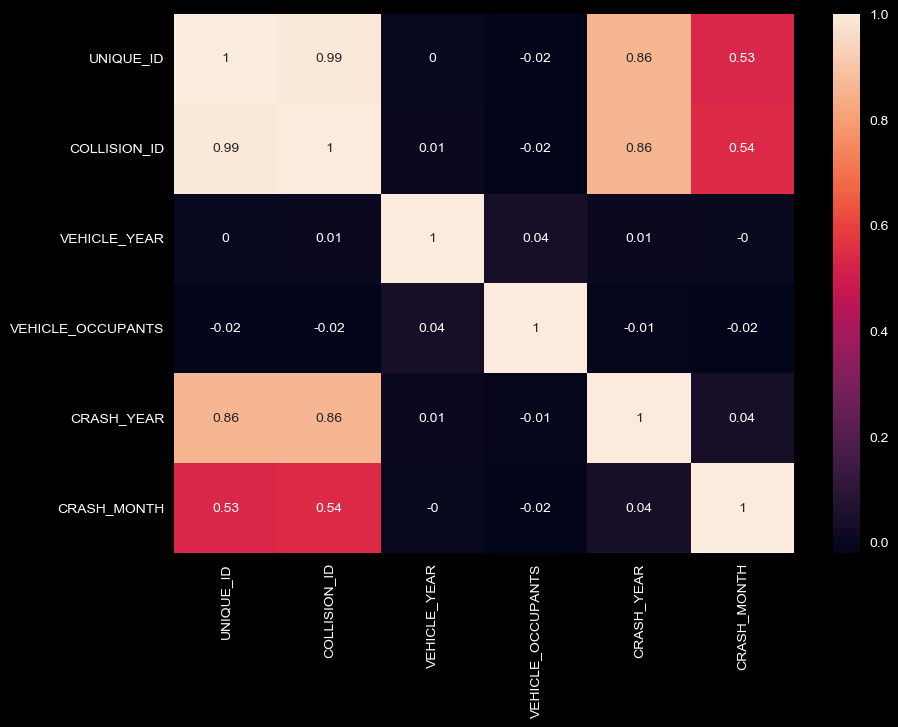

In [194]:
#Display correlation matrix
make = df_mvc_update.loc[df_mvc_update.CONTRIBUTING_FACTOR_1 == 'Driver Inattention/Distraction']

corr_map = df_mvc_update.corr().round(2)
corr_map

plt.figure(figsize=(10,7))
plot= sns.heatmap(df_mvc_update.corr().round(2),annot=True)

In [ ]:
#Exploratory Data Analysis

In [166]:
#Retrieve Crash month data from the dataset
df_mvc_update['CRASH_MONTH'] = pd.DatetimeIndex(df_mvc_update['CRASH_DATE']).month
df_mvc_update['CRASH_MONTH']

C:\Users\ramsu\AppData\Local\Temp\ipykernel_26456\3513332639.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mvc_update['CRASH_MONTH'] = pd.DatetimeIndex(df_mvc_update['CRASH_DATE']).month


1          6
2          6
4          6
6          6
9          6
          ..
442103    10
442105    10
442106    10
442107    10
442108    10
Name: CRASH_MONTH, Length: 330762, dtype: int64

In [167]:
df_mvc_update['CRASH_MONTH'].value_counts()

1     36627
2     34415
3     31577
10    29092
8     29030
9     28619
7     28215
6     27322
11    26684
5     24969
4     19895
12    14317
Name: CRASH_MONTH, dtype: int64

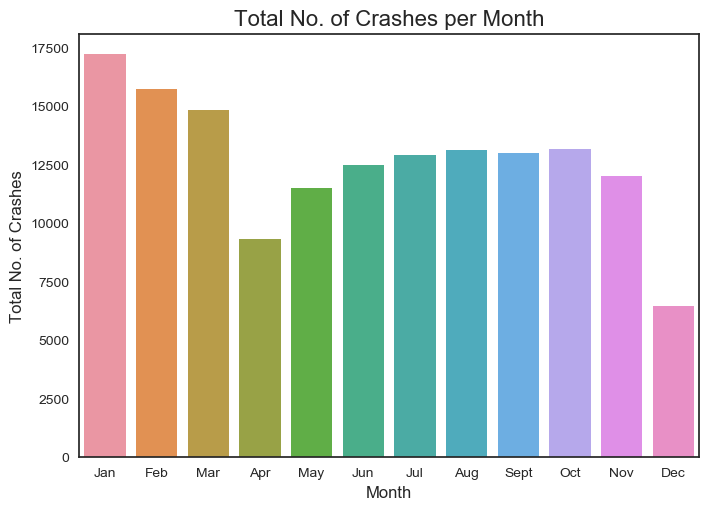

In [252]:
#Plot 1: Total Number of Crashes per month
plt.style.use('seaborn-white')
sns.countplot(data = df_mvc_update, x = 'CRASH_MONTH')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9,10,11], labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sept","Oct","Nov","Dec"])
plt.xlabel('Month')
plt.ylabel('Total No. of Crashes')
plt.title('Total No. of Crashes per Month')
plt.show()

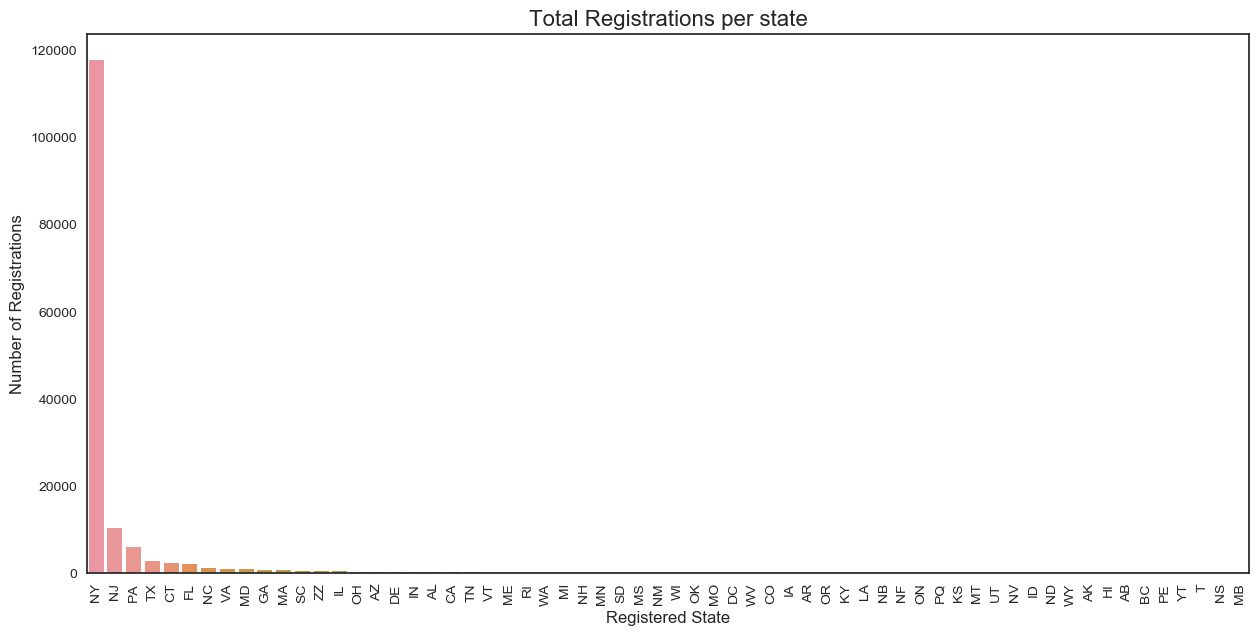

In [253]:
#Plot 2: Total Registrations per state
plt.style.use('seaborn-white')
plt.figure(figsize=(15,7))
plt.title("Total Registrations per state")
order = df_mvc_update['STATE_REGISTRATION'].value_counts(ascending=False).index
sns.countplot(x='STATE_REGISTRATION', data=df_mvc_update, order=order)
plt.xticks(rotation=90)
plt.xlabel("Registered State")
plt.ylabel("Number of Registrations")
plt.show()

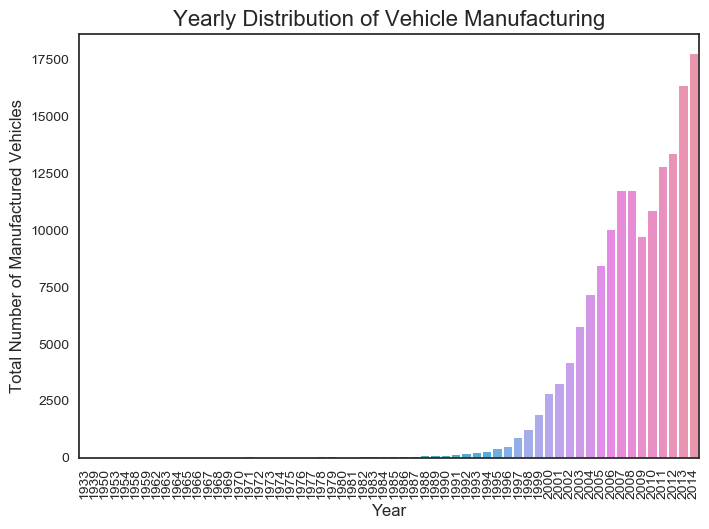

In [255]:
#Plot 3: Yearly Distribution of Vehicle Manufacturing
plt.style.use('seaborn-white')
temp_index = df_mvc_update['VEHICLE_YEAR']
temp_index = temp_index.astype(int)
sns.countplot(data=df_mvc_update, x = temp_index)
plt.title("Yearly Distribution of Vehicle Manufacturing")
plt.xlabel("Year")
plt.ylabel("Total Number of Manufactured Vehicles")
plt.xticks(rotation=90)
plt.show()

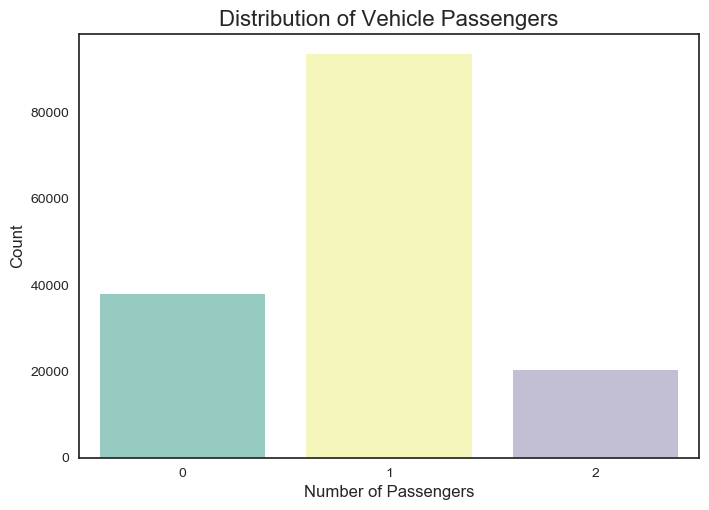

In [256]:
#Plot 4: Distribution of Vehicle Passengers
plt.style.use('seaborn-white')
var = df_mvc_update["VEHICLE_OCCUPANTS"]
var = var.astype(int)
sns.countplot(data =df_mvc_update ,x = var)
plt.title("Distribution of Vehicle Passengers")
plt.xlabel("Number of Passengers")
plt.ylabel("Count")
plt.show()

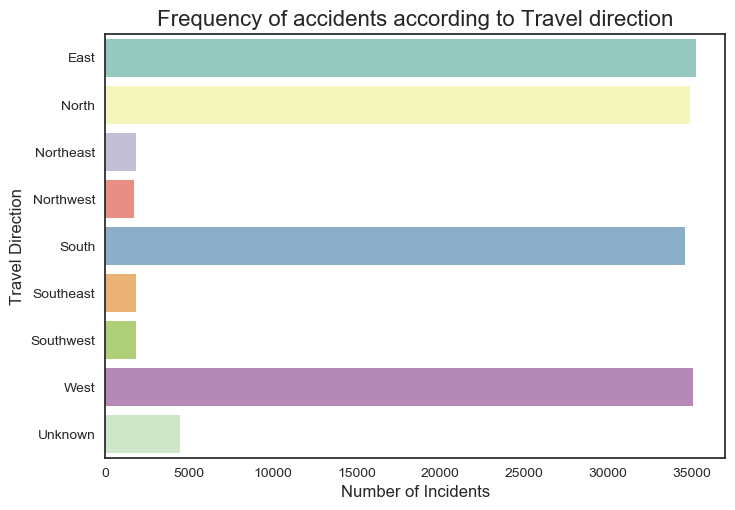

In [258]:
#Plot 5: Frequency of accidents according to Travel Direction
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_update, y= 'TRAVEL_DIRECTION', order=["East","North","Northeast","Northwest","South","Southeast","Southwest","West","Unknown"])
plt.xlabel('Number of Incidents')
plt.ylabel('Travel Direction')
plt.title('Frequency of accidents according to Travel direction')
plt.show()

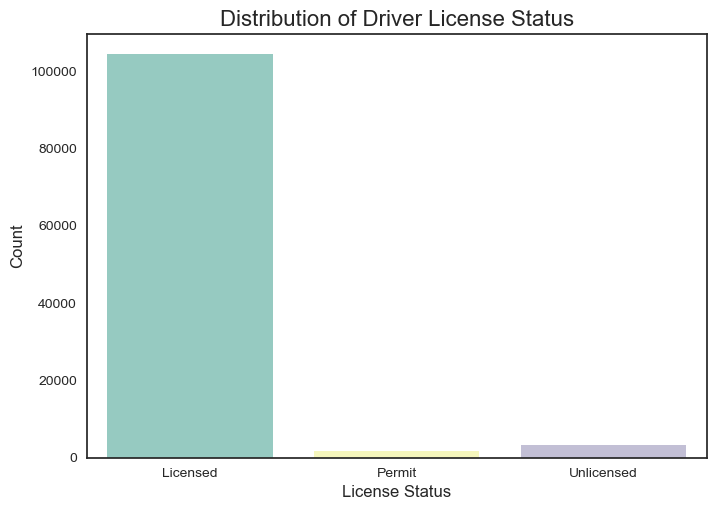

In [259]:
#Plot 6: Distribution of Driver License Status
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_update, x='DRIVER_LICENSE_STATUS')
plt.xlabel('License Status')
plt.ylabel("Count")
plt.title('Distribution of Driver License Status')
plt.show()

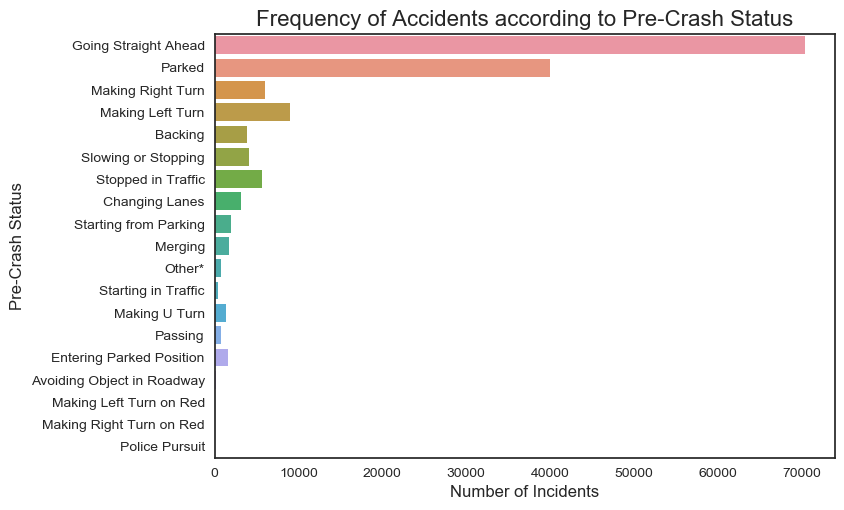

In [261]:
#Plot 7: Frequency of Accidents according to pre-crash status
plt.style.use('seaborn-white')
sns.countplot(data = df_mvc_update, y= 'PRE_CRASH')
plt.title("Frequency of Accidents according to Pre-Crash Status")
plt.xlabel("Number of Incidents")
plt.ylabel("Pre-Crash Status")
plt.show()

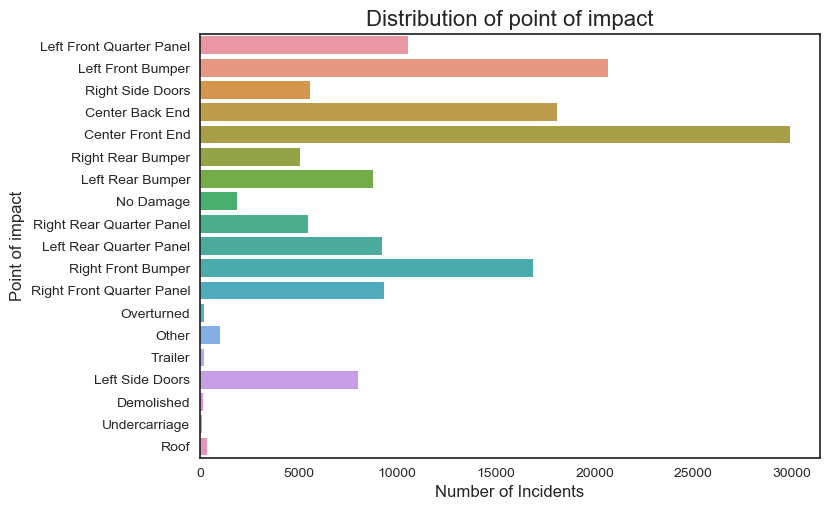

In [262]:
#Plot 9: Distribution of Point of impact
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_update,y= 'POINT_OF_IMPACT')
plt.title("Distribution of point of impact")
plt.xlabel("Number of Incidents")
plt.ylabel("Point of impact")
plt.show()

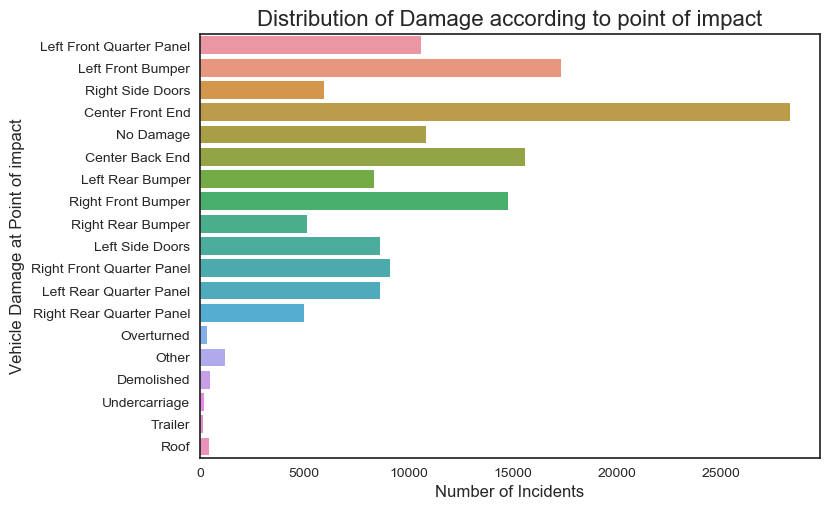

In [263]:
#Plot 10: Distribution of Damage according to point of impact
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_update,y= 'VEHICLE_DAMAGE')
plt.title("Distribution of Damage according to point of impact")
plt.xlabel("Number of Incidents")
plt.ylabel("Vehicle Damage at Point of impact")
plt.show()

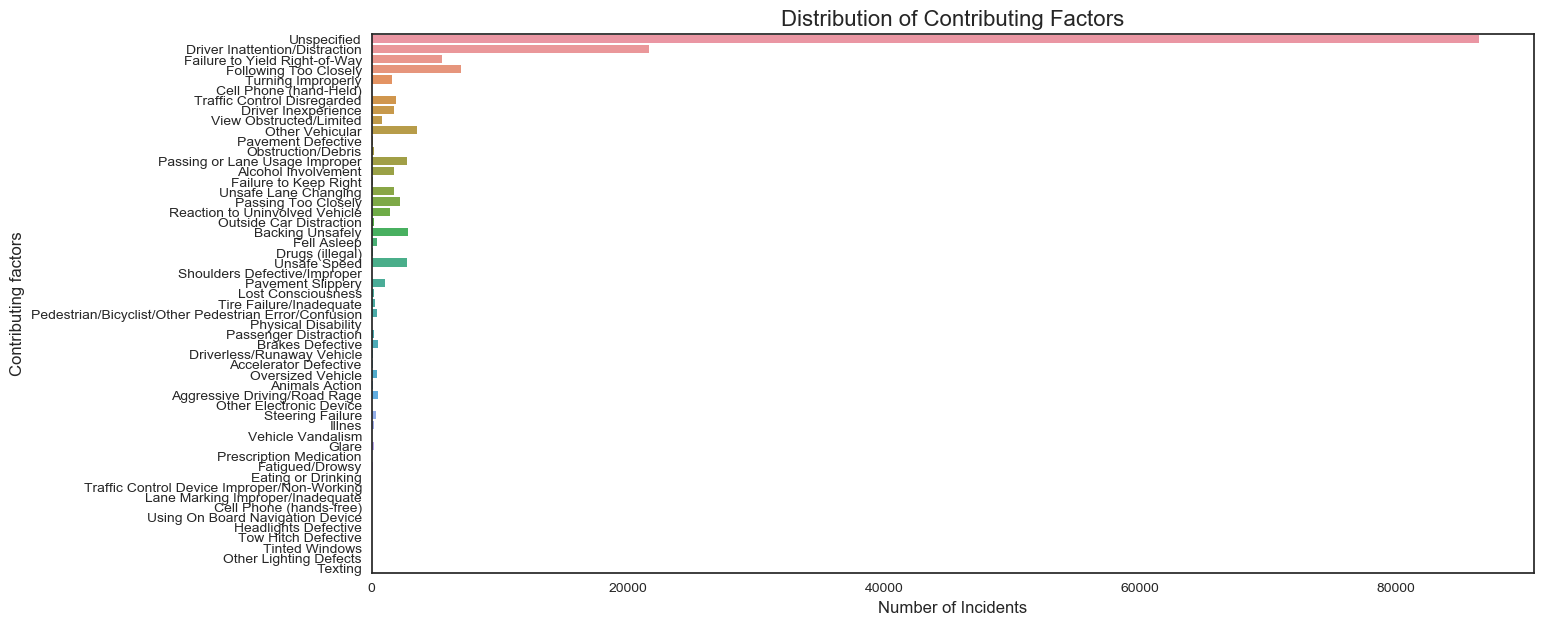

In [267]:
#Plot 11: Distribution of Contributing factors
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
sns.countplot(data=df_mvc_update,y= 'CONTRIBUTING_FACTOR_1')
plt.title("Distribution of Contributing Factors")
plt.xlabel("Number of Incidents")
plt.ylabel("Contributing factors")
plt.show()

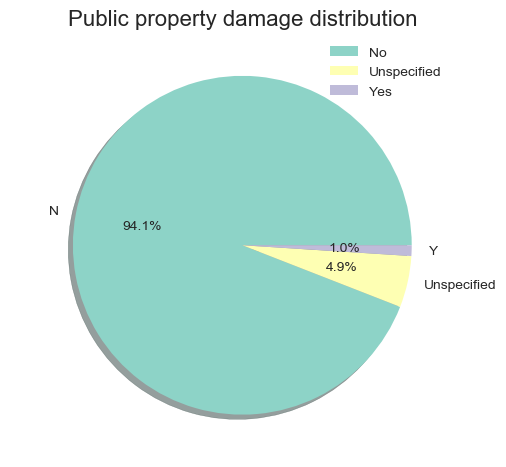

In [278]:
#Plot 12: Public Property damage distribution
df_mvc_update['PUBLIC_PROPERTY_DAMAGE'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.title("Public property damage distribution")
plt.ylabel(" ")
plt.legend(labels=["No","Unspecified","Yes"])
plt.show()